In [17]:
## State Schema

from typing import TypedDict, Annotated
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages


class State(TypedDict):
    messages: Annotated[list, add_messages]

In [18]:
from dotenv import load_dotenv
import os
load_dotenv()
os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [19]:
from langchain_openai import ChatOpenAI
from langchain_groq import ChatGroq

llm = ChatOpenAI(model="gpt-5-2025-08-07")
llm.invoke("Hello")

llm_groq = ChatGroq(model="qwen/qwen3-32b")

llm_groq.invoke("Hey I am Ibo and I like to play basketball")

AIMessage(content='<think>\nOkay, the user is Ibo and he likes basketball. I should respond in a friendly way. Maybe start with a greeting and ask about his experience with basketball. I want to encourage him to share more, like how long he\'s been playing or his favorite part about it. Also, maybe ask about his goals or what he enjoys most in the game. I should keep the tone positive and engaging. Let me make sure the questions are open-ended so he can elaborate. Avoid any assumptions and keep it simple. Let\'s see, maybe something like, "Hi Ibo! That\'s awesome. How long have you been playing basketball? Do you have a favorite position or aspect of the game you enjoy the most?" Yeah, that sounds good. It invites him to talk more and shows genuine interest.\n</think>\n\nHi Ibo! That\'s awesome—basketball is such an exciting and dynamic sport! 🏀 How long have you been playing, and what’s your favorite part about the game? Do you enjoy shooting, dribbling, or maybe teamwork the most? Al

In [20]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()

def superbot(state: State):
    return {"messages": [llm_groq.invoke(state["messages"])]}

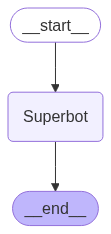

In [21]:

from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode, tools_condition
from IPython.display import Image, display

graph = StateGraph(State)

## node
graph.add_node("Superbot", superbot)
graph.add_edge(START, "Superbot")
graph.add_edge("Superbot", END)

graph_builder = graph.compile(checkpointer=memory)


display(Image(graph_builder.get_graph().draw_mermaid_png()))


In [22]:
config = {"configurable": {"thread_id": "1"}}
graph_builder.invoke({"messages": "Hey I am Ibo and I like to play basketball"}, config)

{'messages': [HumanMessage(content='Hey I am Ibo and I like to play basketball', additional_kwargs={}, response_metadata={}, id='4769d4a2-ac3b-4de7-81e9-ae11cb1d44fa'),
  AIMessage(content="<think>\nOkay, the user introduced himself as Ibo and mentioned he likes to play basketball. Let me think about how to respond appropriately.\n\nFirst, I should acknowledge his introduction warmly. Maybe start with a friendly greeting. Then, since he mentioned basketball, I can ask a follow-up question to engage him more. It's good to show interest in his hobbies.\n\nI need to make sure the response is encouraging and open-ended. Perhaps ask about his favorite aspects of basketball or what position he plays. That way, he can share more details, and the conversation can flow naturally.\n\nAlso, I should keep the tone positive and supportive. Maybe add an emoji related to basketball to make it more relatable. Let me check for any possible errors. The response should be concise but not too short. Alrig

### UPDATES or VALUES

### VALUES: This streams the full state of the graph after each node is called.
### UPDATES: This stream updates to the state of the graph after each node is called.

In [23]:
## Creating a thread
config = {"configurable": {"thread_id": "2"}}

for chunk in graph_builder.stream({"messages": "Hi, my name is Ibo and I like basketball"}, config, stream_mode="updates"):
    print(chunk)

{'Superbot': {'messages': [AIMessage(content="<think>\nOkay, the user introduced himself as Ibo and mentioned he likes basketball. I should respond in a friendly manner. First, maybe ask him about his favorite team or player to keep the conversation going. Also, since he's into basketball, I can suggest some related topics like training tips, games to watch, or basketball culture in his country. Need to make sure my tone is positive and encouraging. Let me check if there's any specific info I should include. Maybe mention some popular NBA players or refer to common basketball elements to build rapport. Avoid any technical jargon unless it's necessary. Keep it simple and engaging. Alright, time to put it all together.\n</think>\n\nHi Ibo! 🏀 Welcome! It's awesome to meet someone who loves basketball. Do you play the game, or are you more of a fan of watching it? What team or player do you admire the most? I’d also love to hear if you have a favorite moment from recent games or any upcomi

In [24]:
## Creating a thread
config = {"configurable": {"thread_id": "2"}}

for chunk in graph_builder.stream({"messages": "Hi, my name is Ibo and I like basketball"}, config, stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi, my name is Ibo and I like basketball', additional_kwargs={}, response_metadata={}, id='7c73fed9-0c59-4661-bf17-91d5a0a49e43'), AIMessage(content="<think>\nOkay, the user introduced himself as Ibo and mentioned he likes basketball. I should respond in a friendly manner. First, maybe ask him about his favorite team or player to keep the conversation going. Also, since he's into basketball, I can suggest some related topics like training tips, games to watch, or basketball culture in his country. Need to make sure my tone is positive and encouraging. Let me check if there's any specific info I should include. Maybe mention some popular NBA players or refer to common basketball elements to build rapport. Avoid any technical jargon unless it's necessary. Keep it simple and engaging. Alright, time to put it all together.\n</think>\n\nHi Ibo! 🏀 Welcome! It's awesome to meet someone who loves basketball. Do you play the game, or are you more of a fan of 

In [25]:
## Creating a thread
config = {"configurable": {"thread_id": "2"}}

for chunk in graph_builder.stream({"messages": "I also like football"}, config, stream_mode="updates"):
    print(chunk)

{'Superbot': {'messages': [AIMessage(content='<think>\nOkay, let\'s see. Ibo mentioned they like basketball and now they also like football. I need to respond appropriately.\n\nFirst, I should acknowledge both sports they mentioned. They already know I\'m into basketball, so maybe I can show that I\'m open to talking about football too. But I should stay true to the basketball angle since that\'s what I know best. \n\nWait, the user might be interested in discussing football, but maybe they want to keep the conversation focused on basketball. Or maybe they just wanted to add another sport they like. I need to make sure I don\'t push too hard into football if they\'re not interested. \n\nI should thank them for sharing and express interest in both sports. Maybe ask if they play football or just watch. Also, ask if they have a favorite team or player in football. But keep the focus on basketball since that\'s the main sport they initially mentioned. \n\nLet me check the previous messages

In [26]:
## Creating a thread
config = {"configurable": {"thread_id": "2"}}

for chunk in graph_builder.stream({"messages": "I also like football"}, config, stream_mode="values"):
    print(chunk)

{'messages': [HumanMessage(content='Hi, my name is Ibo and I like basketball', additional_kwargs={}, response_metadata={}, id='7c73fed9-0c59-4661-bf17-91d5a0a49e43'), AIMessage(content="<think>\nOkay, the user introduced himself as Ibo and mentioned he likes basketball. I should respond in a friendly manner. First, maybe ask him about his favorite team or player to keep the conversation going. Also, since he's into basketball, I can suggest some related topics like training tips, games to watch, or basketball culture in his country. Need to make sure my tone is positive and encouraging. Let me check if there's any specific info I should include. Maybe mention some popular NBA players or refer to common basketball elements to build rapport. Avoid any technical jargon unless it's necessary. Keep it simple and engaging. Alright, time to put it all together.\n</think>\n\nHi Ibo! 🏀 Welcome! It's awesome to meet someone who loves basketball. Do you play the game, or are you more of a fan of 

In [27]:
config = {"configurable": {"thread_id": "3"}}

async for event in graph_builder.astream_events({"messages": ["Hi my name is Ibo and I like to play basketball"]}, config, version="v2"):
    print(event)

{'event': 'on_chain_start', 'data': {'input': {'messages': ['Hi my name is Ibo and I like to play basketball']}}, 'name': 'LangGraph', 'tags': [], 'run_id': '63007d29-c41e-469b-a837-cb8f60d5c347', 'metadata': {'thread_id': '3'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi my name is Ibo and I like to play basketball', additional_kwargs={}, response_metadata={}, id='4061ab3a-4b8c-4359-8e1b-d84a6599ad42')]}}, 'name': 'Superbot', 'tags': ['graph:step:1'], 'run_id': '7cc8dc54-cdfe-4afb-990c-20c502ae2d3f', 'metadata': {'thread_id': '3', 'langgraph_step': 1, 'langgraph_node': 'Superbot', 'langgraph_triggers': ('branch:to:Superbot',), 'langgraph_path': ('__pregel_pull', 'Superbot'), 'langgraph_checkpoint_ns': 'Superbot:344ec508-9b42-5a92-ef77-09e5e3b19562'}, 'parent_ids': ['63007d29-c41e-469b-a837-cb8f60d5c347']}
{'event': 'on_chat_model_start', 'data': {'input': {'messages': [[HumanMessage(content='Hi my name is Ibo and I like to pla